In [1]:
import matplotlib.pyplot as plt
import numpy as np

from DQN_train import train_dqn
from DDQN_train import train_ddqn

In [2]:
env_name = 'CartPole-v1'

n_episodes = 1000
batch_size = 64
hidden_dim = 128
lr = 1e-3
gamma = 0.8
eps_start = 1.0
eps_end = 0.05
eps_decay_iters = 1000
mem_cap = 10000
seed = 42

In [3]:
dqn_durations, dqn_returns = train_dqn(env_name, n_episodes, batch_size, hidden_dim, lr, gamma, 
                                       eps_start, eps_end, eps_decay_iters, mem_cap, seed)

/home/kjw/anaconda3/envs/rlcourse/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


Episode 0 finished after 8 steps with return 4.161139200000001
Episode 10 finished after 19 steps with return 4.927942405962074
Episode 20 finished after 22 steps with return 4.963106511852582
Episode 30 finished after 15 steps with return 4.824078139555841
Episode 40 finished after 18 steps with return 4.909928007452591
Episode 50 finished after 42 steps with return 4.999574647041351
Episode 60 finished after 99 steps with return 4.999999998726855
Episode 70 finished after 80 steps with return 4.999999911657649
Episode 80 finished after 86 steps with return 4.999999976841584
Episode 90 finished after 132 steps with return 4.999999999999196
Episode 100 finished after 166 steps with return 5.000000000000001
Episode 110 finished after 284 steps with return 5.000000000000001
Episode 120 finished after 163 steps with return 5.000000000000001
Episode 130 finished after 206 steps with return 5.000000000000001
Episode 140 finished after 324 steps with return 5.000000000000001
Episode 150 fini

In [4]:
ddqn_durations, ddqn_returns = train_ddqn(env_name, n_episodes, batch_size, hidden_dim, lr, gamma,
                                          eps_start, eps_end, eps_decay_iters, mem_cap, seed)

Episode 0 finished after 9 steps with return 4.328911360000001
Episode 10 finished after 11 steps with return 4.5705032704000015
Episode 20 finished after 11 steps with return 4.5705032704000015
Episode 30 finished after 9 steps with return 4.328911360000001
Episode 40 finished after 14 steps with return 4.780097674444801
Episode 50 finished after 12 steps with return 4.656402616320001
Episode 60 finished after 10 steps with return 4.463129088000001
Episode 70 finished after 13 steps with return 4.725122093056001
Episode 80 finished after 16 steps with return 4.859262511644673
Episode 90 finished after 22 steps with return 4.963106511852582
Episode 100 finished after 36 steps with return 4.99837740723171
Episode 110 finished after 85 steps with return 4.99999997105198
Episode 120 finished after 110 steps with return 4.99999999989064
Episode 130 finished after 133 steps with return 4.999999999999358
Episode 140 finished after 224 steps with return 5.000000000000001
Episode 150 finished 

In [5]:
def smooth(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

def plot_run(durations, returns, 
             method_name='DQN', env_name='CartPole'):

    plt.plot(smooth(durations, 10))
    plt.title(f'Episode durations per episode for {method_name} on {env_name}')
    plt.xlabel('Episode')
    plt.ylabel('Time steps')
    plt.show()

    plt.plot(smooth(returns, 10))
    plt.title(f'Episode returns per episode for {method_name} on {env_name}')
    plt.xlabel('Episode')
    plt.ylabel('Return (G)')
    plt.show()

def plot_compare(durations_1, returns_1, durations_2, returns_2, 
                 method1='DQN', method2='DDQN', env_name='CartPole'):
    plt.plot(smooth(durations_1, 10), label=method1)
    plt.plot(smooth(durations_2, 10), label=method2)
    plt.title(f'Episode durations per episode on {env_name}')
    plt.xlabel('Episode')
    plt.ylabel('Time steps')
    plt.legend()
    plt.show()
    
    plt.plot(smooth(returns_1, 10), label=method1)
    plt.plot(smooth(returns_2, 10), label=method2)
    plt.title(f'Episode returns per episode on {env_name}')
    plt.xlabel('Episode')
    plt.ylabel('Return (G)')
    plt.legend()
    plt.show()

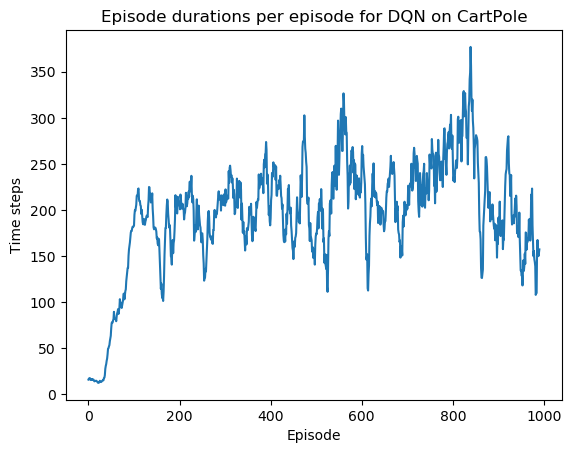

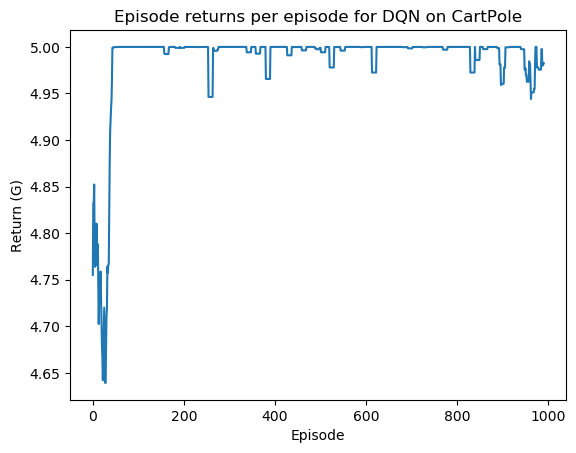

In [6]:
plot_run(dqn_durations, dqn_returns)

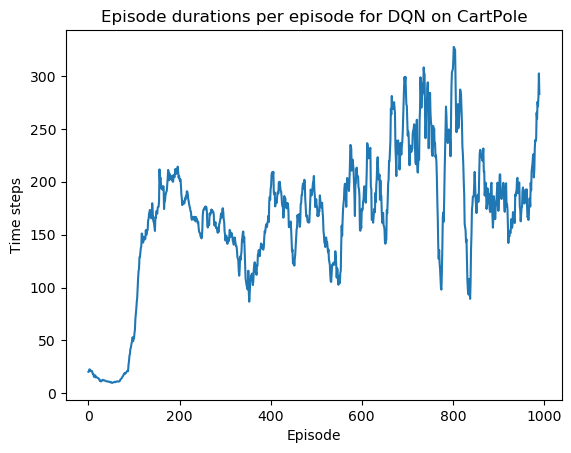

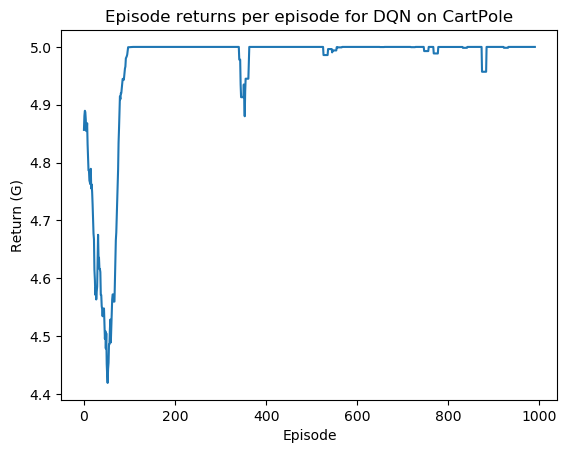

In [7]:
plot_run(ddqn_durations, ddqn_returns)

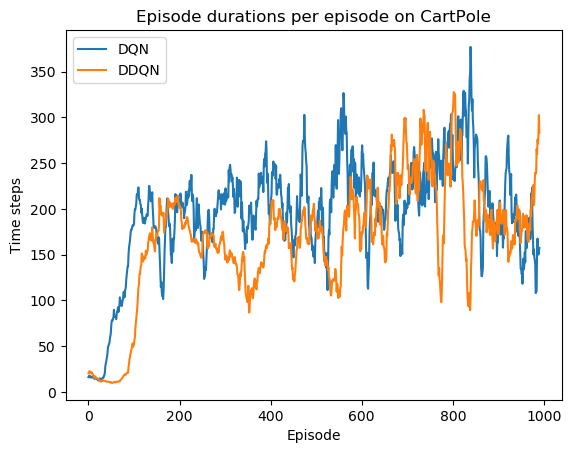

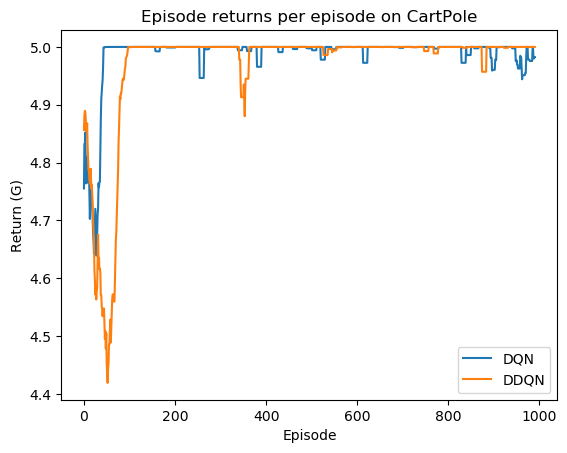

In [8]:
plot_compare(dqn_durations, dqn_returns, ddqn_durations, ddqn_returns)